In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

In [40]:
#Load Dataset
sold = pd.read_csv('data/SKU Sold Detail.csv')
sold

,Region,BU_ID,Country,Revenue_Apr21,Margin_Apr21,Revenue_Oct21,Margin_Oct21,Revenue_Jan22,Margin_Jan22
0,AMER,11,United States,265.97,225.20,99.99,86.40,99.99,86.40
1,AMER,11,United States,13.08,9.44,0.00,0.00,0.00,0.00
2,AMER,11,United States,92.00,79.27,92.00,79.27,0.00,0.00
3,AMER,11,United States,77646.33,72910.17,40567.49,39164.45,25413.54,24746.22
4,AMER,11,United States,478.85,390.65,464.15,390.65,281.57,237.47
...,...,...,...,...,...,...,...,...,...
7852,EMEA,6969,South Africa,52.91,15.09,52.91,15.09,52.91,15.09
7853,EMEA,6969,South Africa,208.69,68.00,208.69,68.00,208.69,68.00
7854,EMEA,6969,South Africa,102.41,29.89,102.41,29.89,102.41,29.89
7855,EMEA,6969,South Africa,3.03,-0.50,0.00,0.00,0.00,0.00


In [51]:
print(sold.isnull().sum())

Region           0
BU_ID            0
Country          0
Revenue_Apr21    0
Margin_Apr21     0
Revenue_Oct21    0
Margin_Oct21     0
Revenue_Jan22    0
Margin_Jan22     0
dtype: int64


<AxesSubplot:>

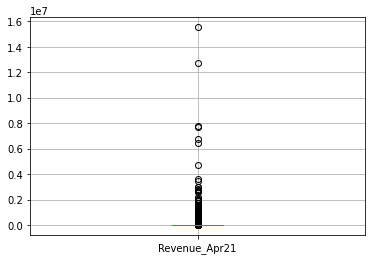

In [52]:
# Visualise column to find outliers
sold.boxplot(column=['Revenue_Apr21'])

<AxesSubplot:>

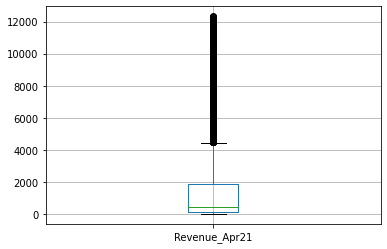

In [53]:
# Determine Interquartile range manually, alternative is using functions from the scipy library
Q1 = sold['Revenue_Apr21'].quantile(0.25)
Q3 = sold['Revenue_Apr21'].quantile(0.75)
IQR = Q3 - Q1
IQR

#Values between Q1-1.5IQR and Q3+1.5IQR
filtered = sold.query('(@Q1 - 1.5 * @IQR) <= Revenue_Apr21 <= (@Q3 + 1.5 * @IQR)')
filtered.boxplot(column='Revenue_Apr21')

In [55]:
#Dropping the outlier rows with x number of standard deviations away from mean
factor = 2
upper_lim = sold['Revenue_Apr21'].mean() + sold['Revenue_Apr21'].std() * factor
lower_lim = sold['Revenue_Apr21'].mean() - sold['Revenue_Apr21'].std() * factor

sold = sold[(sold['Revenue_Apr21'] < upper_lim) & (sold['Revenue_Apr21'] > lower_lim)]
sold

,Region,BU_ID,Country,Revenue_Apr21,Margin_Apr21,Revenue_Oct21,Margin_Oct21,Revenue_Jan22,Margin_Jan22
0,AMER,11,United States,265.97,225.20,99.99,86.40,99.99,86.40
1,AMER,11,United States,13.08,9.44,0.00,0.00,0.00,0.00
2,AMER,11,United States,92.00,79.27,92.00,79.27,0.00,0.00
3,AMER,11,United States,77646.33,72910.17,40567.49,39164.45,25413.54,24746.22
4,AMER,11,United States,478.85,390.65,464.15,390.65,281.57,237.47
...,...,...,...,...,...,...,...,...,...
7852,EMEA,6969,South Africa,52.91,15.09,52.91,15.09,52.91,15.09
7853,EMEA,6969,South Africa,208.69,68.00,208.69,68.00,208.69,68.00
7854,EMEA,6969,South Africa,102.41,29.89,102.41,29.89,102.41,29.89
7855,EMEA,6969,South Africa,3.03,-0.50,0.00,0.00,0.00,0.00


In [50]:
# Change all datatypes of columns
sold['Region'] = sold['Region'].astype(str)
sold['BU_ID'] = sold['BU_ID'].astype(np.int64)
sold['Country'] = sold['Country'].astype(str)
sold['Revenue_Apr21'] = sold['Revenue_Apr21'].astype(float)
sold['Margin_Apr21'] = sold['Margin_Apr21'].astype(float)
sold['Revenue_Oct21'] = sold['Revenue_Oct21'].astype(float)
sold['Margin_Oct21'] = sold['Margin_Oct21'].astype(float)
sold['Revenue_Jan22'] = sold['Revenue_Jan22'].astype(float)
sold['Margin_Jan22'] = sold['Margin_Jan22'].astype(float)
sold.dtypes

Region            object
BU_ID              int64
Country           object
Revenue_Apr21    float64
Margin_Apr21     float64
Revenue_Oct21    float64
Margin_Oct21     float64
Revenue_Jan22    float64
Margin_Jan22     float64
dtype: object

In [48]:
import plotly.express as px
import seaborn as sns

thlete_order = sold['Revenue_Jan22'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=sold, y='Country', order=athlete_order)
plt.title('Top 10 Athletes with the most awarded Medals')
plt.xlabel('No. of awrded medals')
plt.ylabel('Athlete Name');

ModuleNotFoundError: No module named 'seaborn'

In [21]:
sold = sold.groupby([(sold.Region),(sold.BU_ID),(sold.Country)]).agg(
    Revenue_Apr21 = ('Revenue_Apr21','sum'),
    Margin_Apr21 = ('Margin_Apr21','sum'),
    Revenue_Oct21 = ('Revenue_Oct21','sum'),
    Margin_Oct21 = ('Margin_Oct21','sum'),
    Revenue_Jan22 = ('Revenue_Jan22','sum'),
    Margin_Jan22 = ('Margin_Jan22','sum'),).reset_index()
sold